<a href="https://colab.research.google.com/github/xwu23-max/QM2-Project/blob/main/Traffic_Intensity%26Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

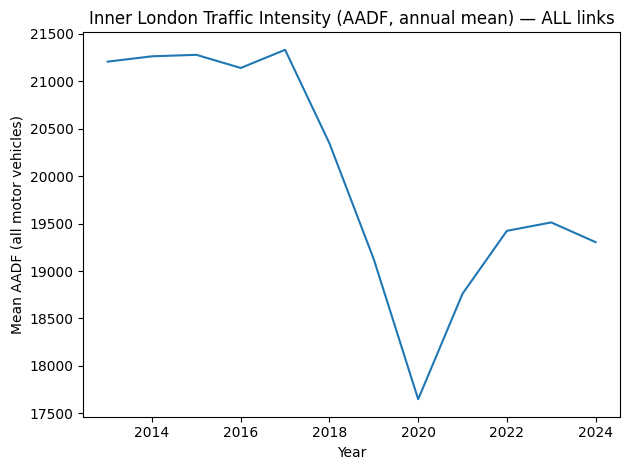

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Inner London AADF (ALL links)

# 1) DfT AADF road-link dataset
PATH = "dft_aadf_region_id_6.csv"
df = pd.read_csv(PATH)

# 2) Basic cleaning: ensure numeric types
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["all_motor_vehicles"] = pd.to_numeric(df["all_motor_vehicles"], errors="coerce")

# Drop rows missing year or AADF
df = df.dropna(subset=["year", "all_motor_vehicles"]).copy()
df["year"] = df["year"].astype(int)

# 3) Define Inner London boroughs (common definition)
INNER_LONDON = {
    "Camden", "Greenwich", "Hackney", "Hammersmith and Fulham", "Islington",
    "Kensington and Chelsea", "Lambeth", "Lewisham", "Southwark", "Tower Hamlets",
    "Wandsworth", "Westminster", "City of London"
}

# 4) Filter to Inner London
BOROUGH_COL = "local_authority_name"
if BOROUGH_COL not in df.columns:
    raise KeyError(
        f"Expected column '{BOROUGH_COL}' not found. "
        f"Available columns: {list(df.columns)}"
    )

inner = df[df[BOROUGH_COL].isin(INNER_LONDON)].copy()

# 5) Aggregate to annual mean AADF across Inner London (ALL links)
annual = (
    inner.groupby("year", as_index=False)
         .agg(
             mean_aadf=("all_motor_vehicles", "mean"),
             median_aadf=("all_motor_vehicles", "median"),
             n_links=("all_motor_vehicles", "count"),
         )
         .sort_values("year")
)

# 6) Restrict to study period
annual = annual[(annual["year"] >= 2013) & (annual["year"] <= 2025)].copy()

# 7) Save annual table
annual.to_csv("inner_london_aadf_all_links_annual_2013_2025.csv", index=False)

# 8) Plot (simple)
plt.figure()
plt.plot(annual["year"], annual["mean_aadf"])
plt.xlabel("Year")
plt.ylabel("Mean AADF (all motor vehicles)")
plt.title("Inner London Traffic Intensity (AADF, annual mean) — ALL links")
plt.tight_layout()
plt.savefig("traffic_intensity_inner_london_all_links.png", dpi=200)
plt.show()

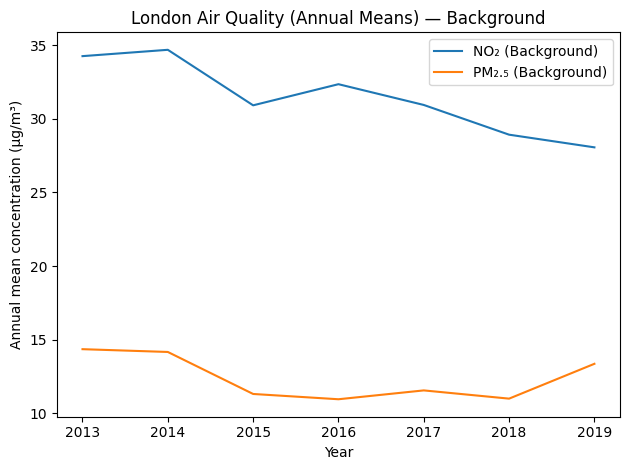

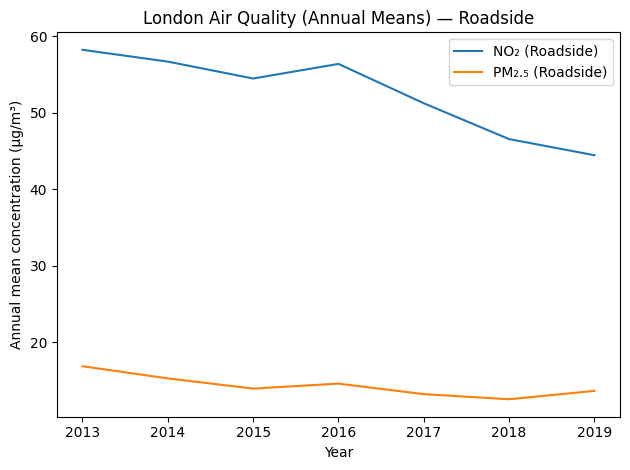

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load data
PATH = "air-quality-london-monthly-averages.csv"
df = pd.read_csv(PATH)

# 2) Parse dates
# Assumes Month column looks like "Jan-13", "Feb-13", etc.
df["Month"] = pd.to_datetime(df["Month"], format="%b-%y", errors="coerce")
df = df.dropna(subset=["Month"]).copy()
df["Year"] = df["Month"].dt.year

# 3) Columns
COLS = {
    "NO2_Background": "London Mean Background:Nitrogen Dioxide (ug/m3)",
    "PM25_Background": "London Mean Background:PM2.5 Particulate (ug/m3)",
    "NO2_Roadside": "London Mean Roadside:Nitrogen Dioxide (ug/m3)",
    "PM25_Roadside": "London Mean Roadside:PM2.5 Particulate (ug/m3)",
}

missing = [v for v in COLS.values() if v not in df.columns]
if missing:
    raise ValueError(
        "Missing expected columns:\n"
        + "\n".join(missing)
        + "\n\nAvailable columns:\n"
        + "\n".join(df.columns)
    )

# Ensure numeric
for new_name, old_name in COLS.items():
    df[new_name] = pd.to_numeric(df[old_name], errors="coerce")

# 4) Compute annual means
annual = (
    df.groupby("Year")[list(COLS.keys())]
      .mean(numeric_only=True)
      .reset_index()
      .sort_values("Year")
)

annual = annual[(annual["Year"] >= 2013) & (annual["Year"] <= 2025)].copy()

annual.to_csv("london_annual_means_no2_pm25_2013_2025.csv", index=False)

# 5) Plot: Background
plt.figure()
plt.plot(annual["Year"], annual["NO2_Background"], label="NO₂ (Background)")
plt.plot(annual["Year"], annual["PM25_Background"], label="PM₂.₅ (Background)")
plt.xlabel("Year")
plt.ylabel("Annual mean concentration (µg/m³)")
plt.title("London Air Quality (Annual Means) — Background")
plt.legend()
plt.tight_layout()
plt.savefig("london_annual_bg_no2_pm25_2013_2025.png", dpi=200)
plt.show()

# 6) Plot: Roadside
plt.figure()
plt.plot(annual["Year"], annual["NO2_Roadside"], label="NO₂ (Roadside)")
plt.plot(annual["Year"], annual["PM25_Roadside"], label="PM₂.₅ (Roadside)")
plt.xlabel("Year")
plt.ylabel("Annual mean concentration (µg/m³)")
plt.title("London Air Quality (Annual Means) — Roadside")
plt.legend()
plt.tight_layout()
plt.savefig("london_annual_roadside_no2_pm25_2013_2025.png", dpi=200)
plt.show()